In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


In [2]:
data=pd.read_csv("/content/train.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
# Separate the target variable (y_data) and features (x_data)
y_data = data["Churn"]
x_data = data.drop("Churn", axis=1)  # Use axis=1 to drop a column/

# Display the first few rows of x_data and y_data
#print(x_data.head())
#print(y_data.head())
print(x_data.shape, y_data.shape)

(7043, 20) (7043,)


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


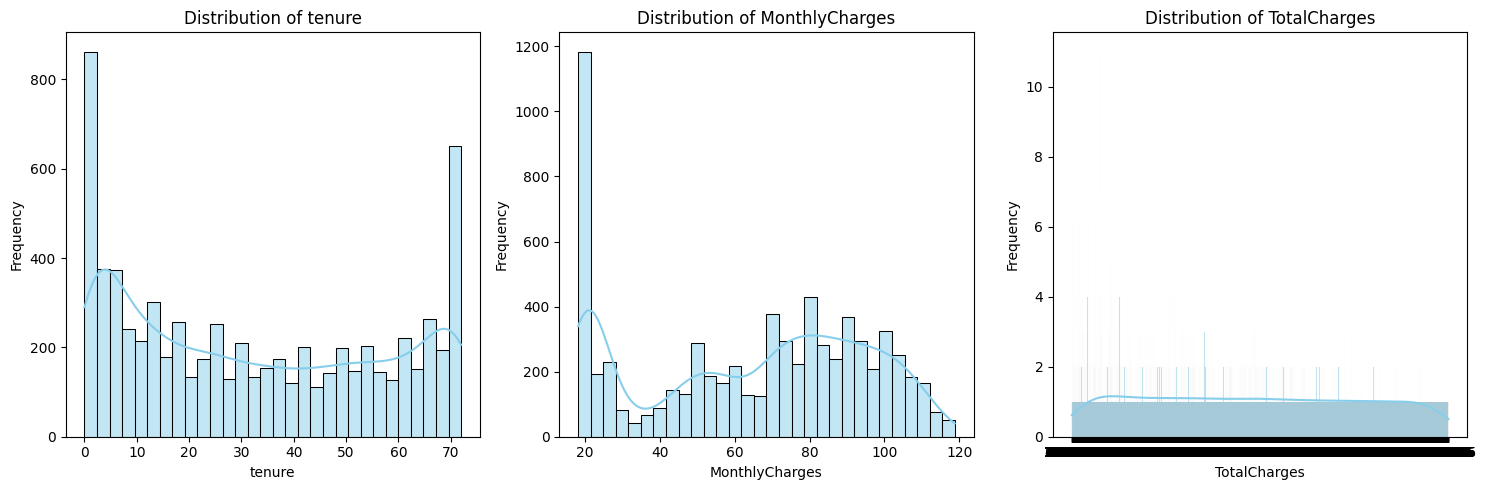

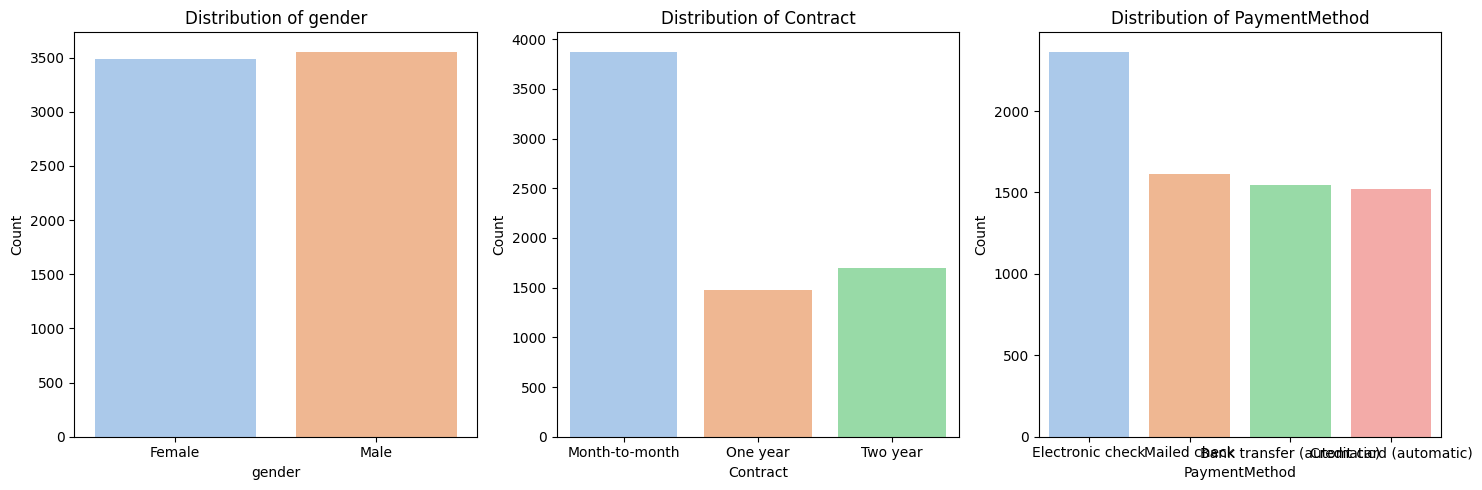

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


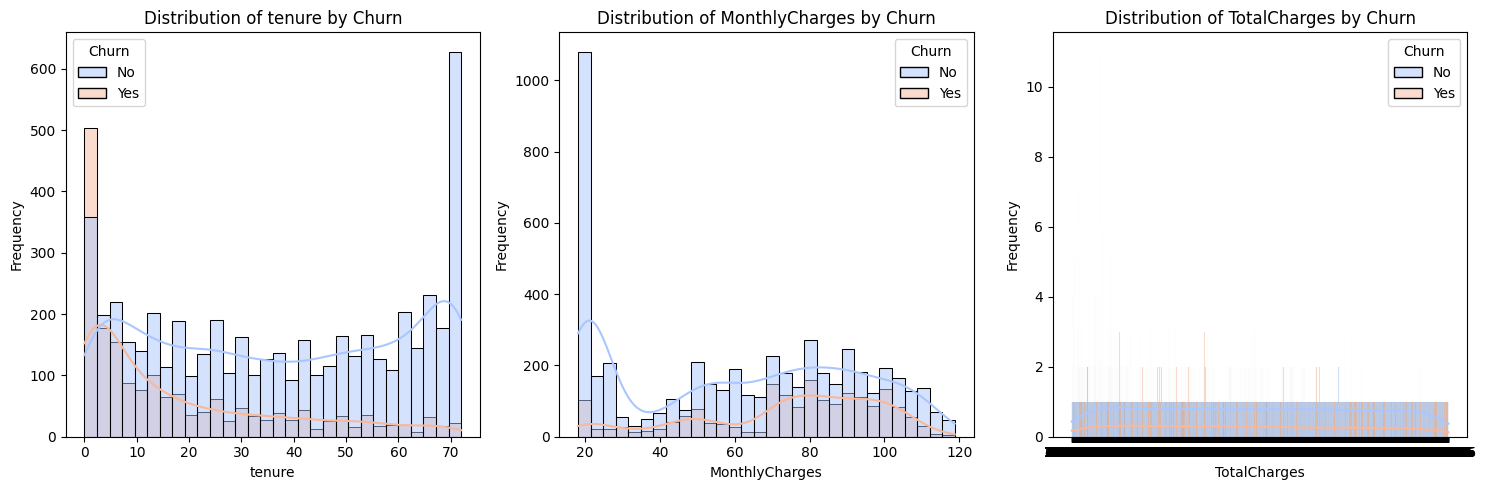

In [5]:
# Plot histograms for numerical features
numerical_columns = ["tenure", "MonthlyCharges", "TotalCharges"]
plt.figure(figsize=(15, 5))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[column], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plot bar plots for categorical features
categorical_columns = ["gender", "Contract", "PaymentMethod"]
plt.figure(figsize=(15, 5))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=data, x=column, palette='pastel')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Plot histograms grouped by Churn
plt.figure(figsize=(15, 5))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=data, x=column, hue="Churn", kde=True, bins=30, palette='coolwarm')
    plt.title(f'Distribution of {column} by Churn')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Skewness before transformation: 0.9630294954586066
Skewness after transformation: -0.8242821681001874


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


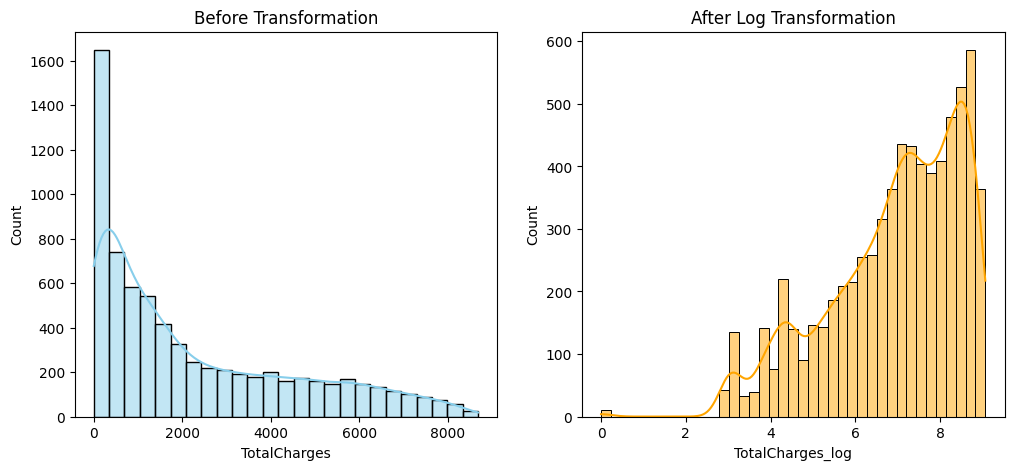

In [6]:
import pandas as pd
import numpy as np
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns

# Convert TotalCharges to numeric, coercing errors to NaN
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Fill missing values with 0 (or drop them)
data['TotalCharges'].fillna(0, inplace=True)

# Check skewness before transformation
print("Skewness before transformation:", skew(data['TotalCharges'].dropna()))

# Apply log transformation
data['TotalCharges_log'] = np.log1p(data['TotalCharges'])

# Check skewness after transformation
print("Skewness after transformation:", skew(data['TotalCharges_log'].dropna()))

# Plot before and after transformation
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['TotalCharges'], kde=True, color='skyblue')
plt.title('Before Transformation')

plt.subplot(1, 2, 2)
sns.histplot(data['TotalCharges_log'], kde=True, color='orange')
plt.title('After Log Transformation')
plt.show()

Skewness after square root transformation: 0.3076546076982302


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


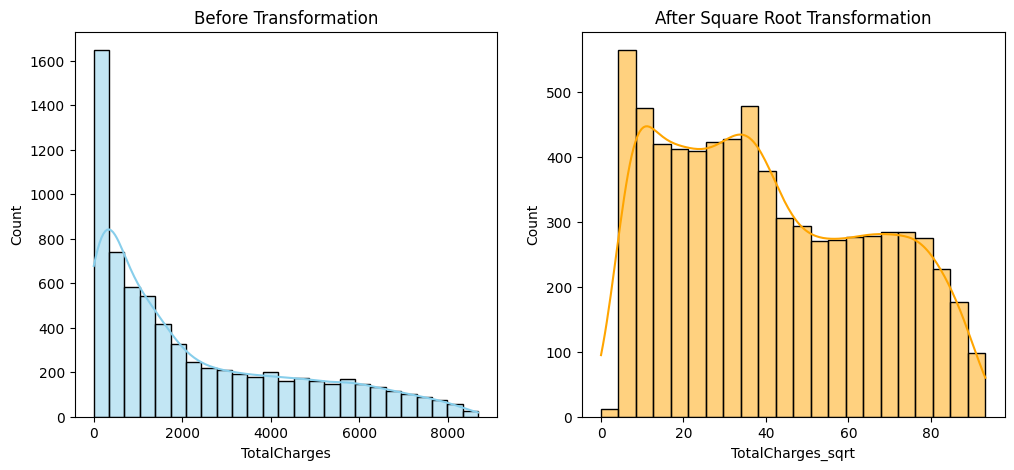

In [7]:
# Apply square root transformation
data['TotalCharges_sqrt'] = np.sqrt(data['TotalCharges'])

# Check skewness after square root transformation
print("Skewness after square root transformation:", skew(data['TotalCharges_sqrt'].dropna()))

# Plot before and after square root transformation
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['TotalCharges'], kde=True, color='skyblue')
plt.title('Before Transformation')

plt.subplot(1, 2, 2)
sns.histplot(data['TotalCharges_sqrt'], kde=True, color='orange')
plt.title('After Square Root Transformation')
plt.show()

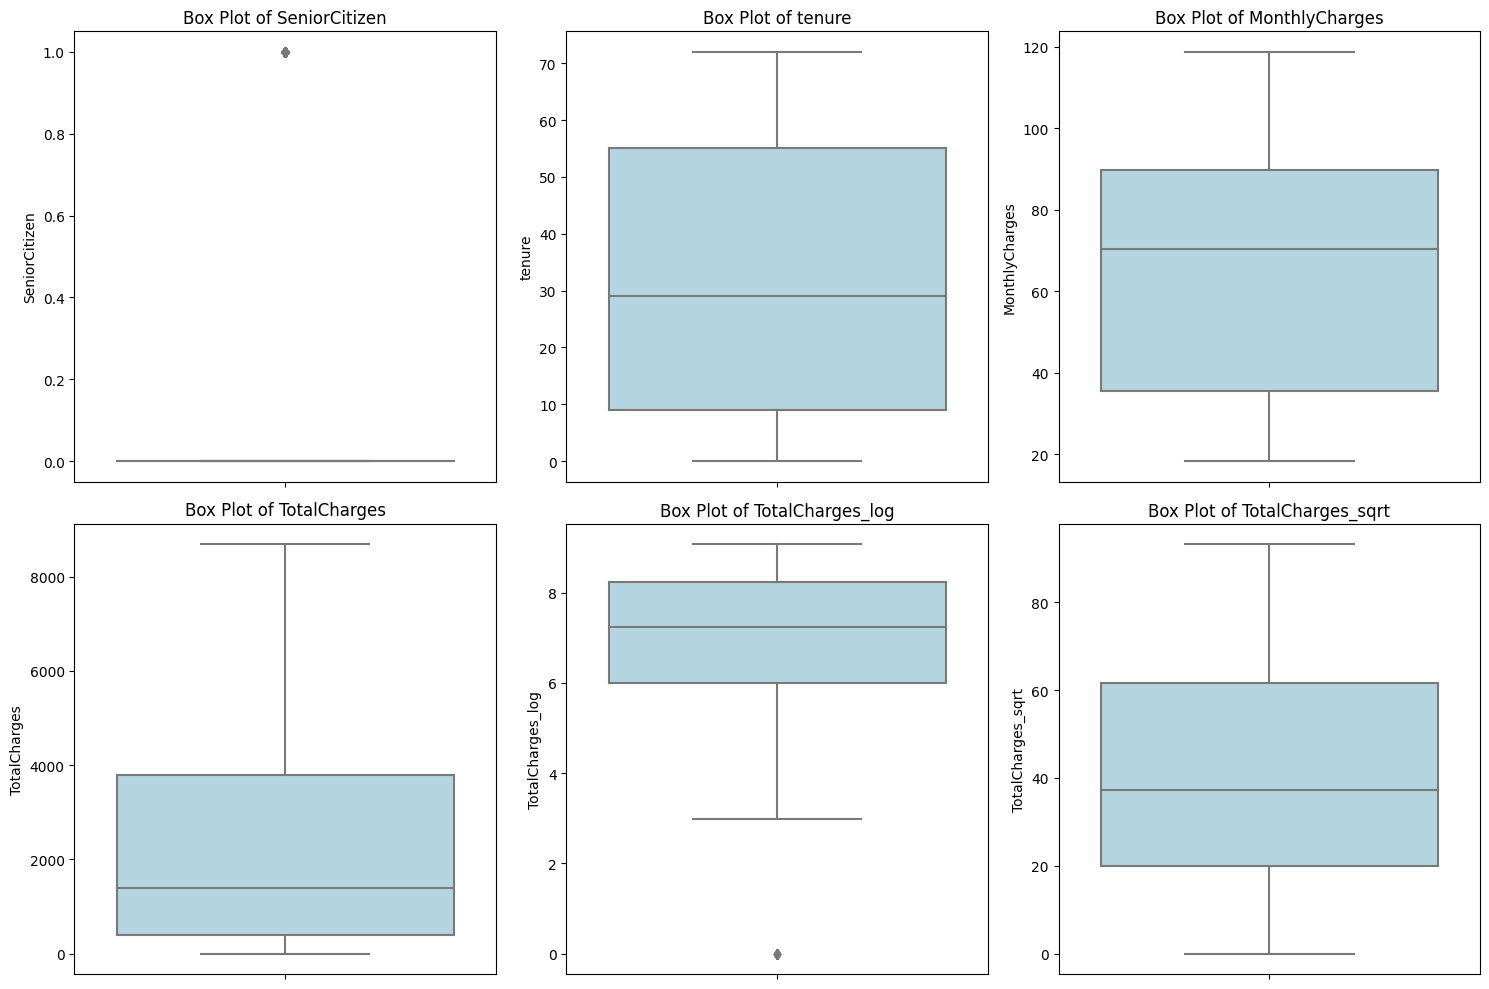

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Select only numeric columns
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Create box plots for all numeric columns
plt.figure(figsize=(15, 10))  # Adjust figure size for better visibility
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)  # Adjust subplot grid based on the number of numeric columns
    sns.boxplot(y=data[column], color='lightblue')
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [9]:
from scipy.stats import skew

# Check skewness of tenure
print("Skewness of tenure:", skew(data['tenure'].dropna()))

Skewness of tenure: 0.2394887299846216


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


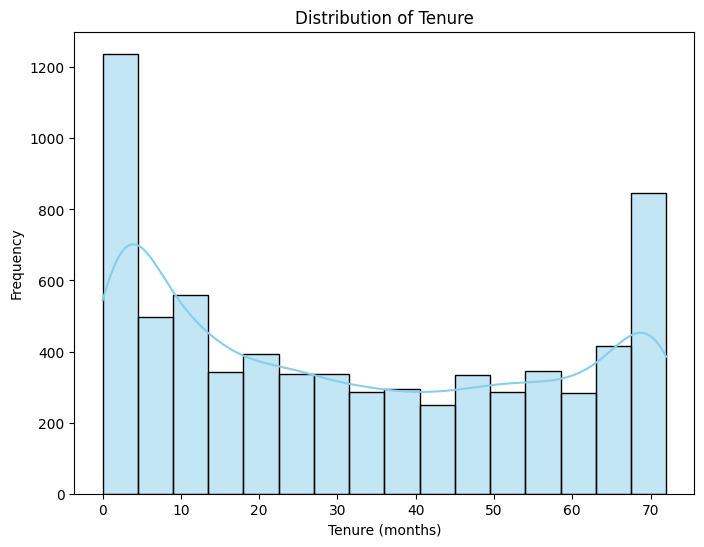

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of tenure
plt.figure(figsize=(8, 6))
sns.histplot(data['tenure'], kde=True, color='skyblue')
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
plt.show()

Skewness after log transformation: -0.7782039607816217


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


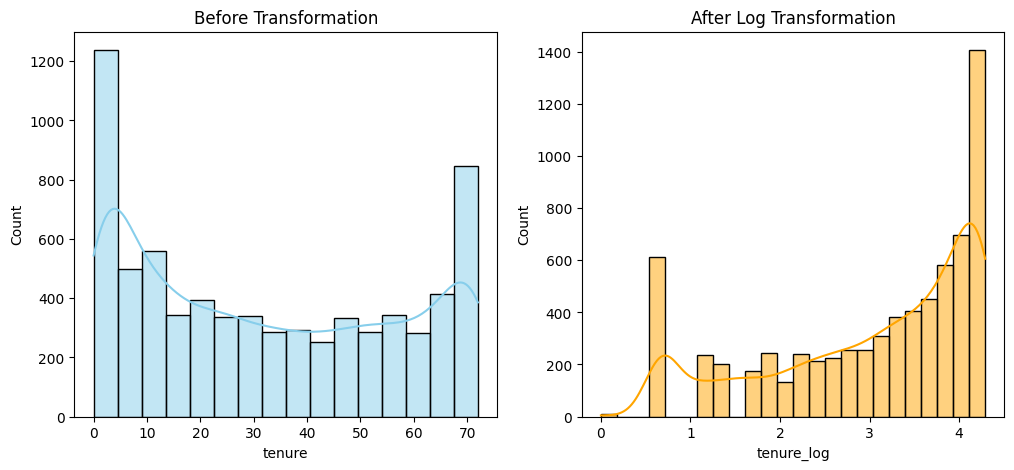

In [11]:
import numpy as np

# Apply log transformation (add 1 to avoid log(0))
data['tenure_log'] = np.log1p(data['tenure'])

# Check skewness after log transformation
print("Skewness after log transformation:", skew(data['tenure_log'].dropna()))

# Plot before and after log transformation
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['tenure'], kde=True, color='skyblue')
plt.title('Before Transformation')

plt.subplot(1, 2, 2)
sns.histplot(data['tenure_log'], kde=True, color='orange')
plt.title('After Log Transformation')
plt.show()

Skewness after square root transformation: -0.23594883462473845


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


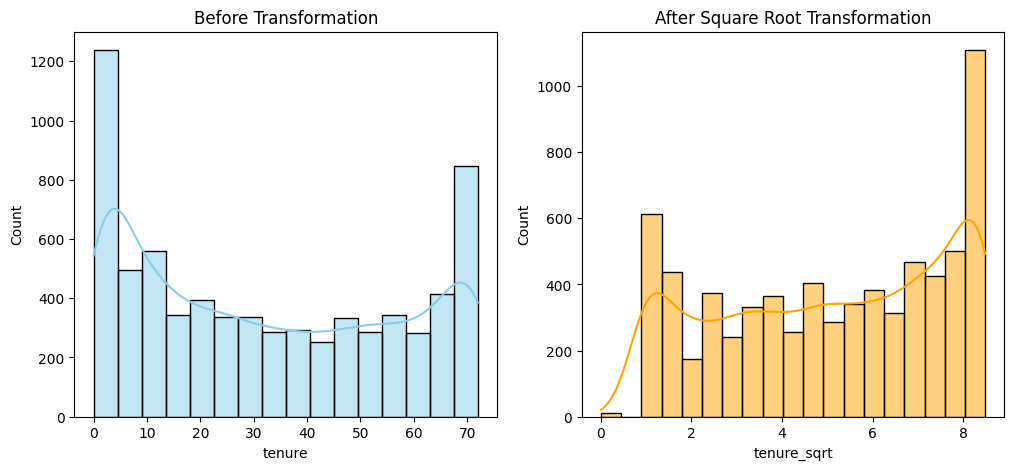

In [12]:
# Apply square root transformation
data['tenure_sqrt'] = np.sqrt(data['tenure'])

# Check skewness after square root transformation
print("Skewness after square root transformation:", skew(data['tenure_sqrt'].dropna()))

# Plot before and after square root transformation
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['tenure'], kde=True, color='skyblue')
plt.title('Before Transformation')

plt.subplot(1, 2, 2)
sns.histplot(data['tenure_sqrt'], kde=True, color='orange')
plt.title('After Square Root Transformation')
plt.show()

Skewness after Box-Cox transformation: -0.2432728840161194


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


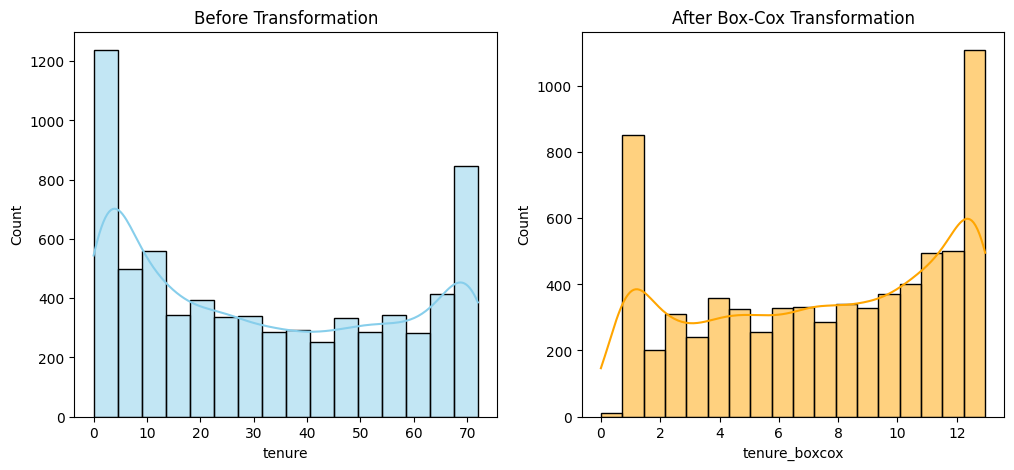

In [13]:
from scipy.stats import boxcox

# Apply Box-Cox transformation (add 1 to handle zeros)
data['tenure_boxcox'], _ = boxcox(data['tenure'] + 1)

# Check skewness after Box-Cox transformation
print("Skewness after Box-Cox transformation:", skew(data['tenure_boxcox'].dropna()))

# Plot before and after Box-Cox transformation
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['tenure'], kde=True, color='skyblue')
plt.title('Before Transformation')

plt.subplot(1, 2, 2)
sns.histplot(data['tenure_boxcox'], kde=True, color='orange')
plt.title('After Box-Cox Transformation')
plt.show()

Skewness of tenure: 0.2394887299846216


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


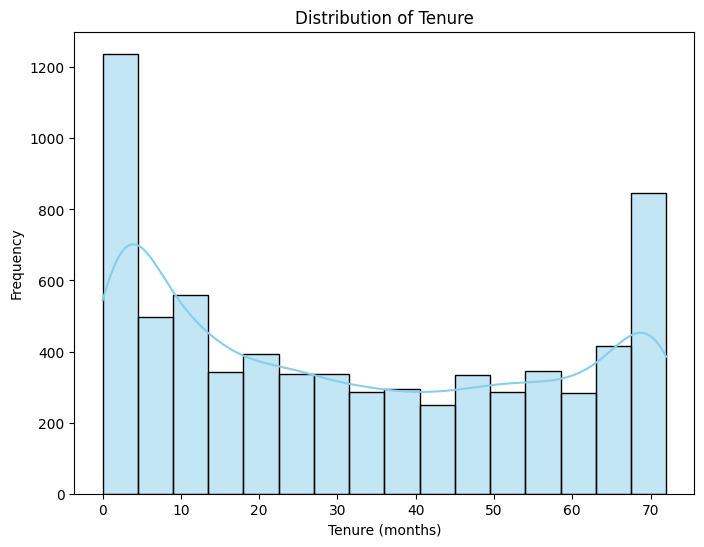

Skewness after log transformation: -0.7782039607816217
Skewness after square root transformation: -0.23594883462473845
Skewness after Box-Cox transformation: -0.2432728840161194


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


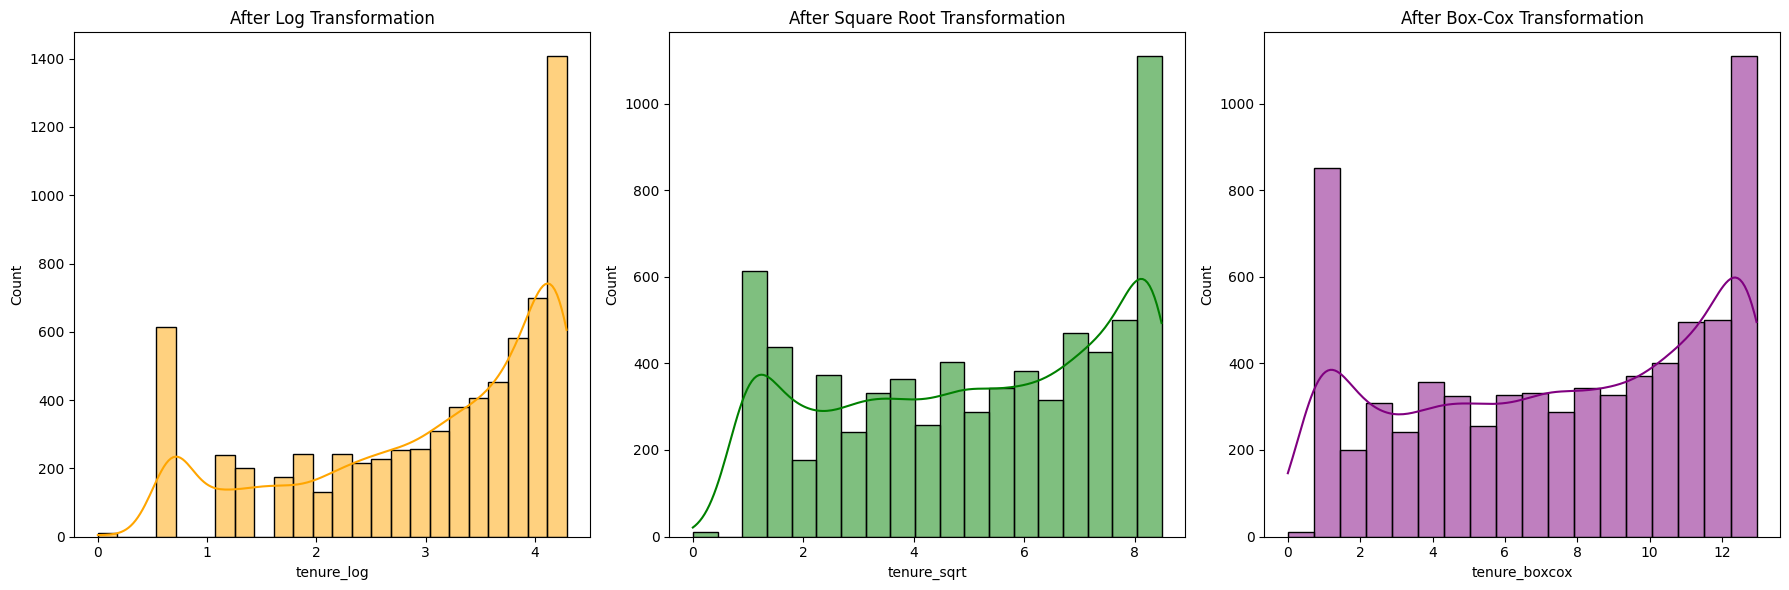

In [14]:
import pandas as pd
import numpy as np
from scipy.stats import skew, boxcox
import matplotlib.pyplot as plt
import seaborn as sns


# Check skewness of tenure
print("Skewness of tenure:", skew(data['tenure'].dropna()))

# Plot histogram of tenure
plt.figure(figsize=(8, 6))
sns.histplot(data['tenure'], kde=True, color='skyblue')
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
plt.show()

# Apply log transformation
data['tenure_log'] = np.log1p(data['tenure'])
print("Skewness after log transformation:", skew(data['tenure_log'].dropna()))

# Apply square root transformation
data['tenure_sqrt'] = np.sqrt(data['tenure'])
print("Skewness after square root transformation:", skew(data['tenure_sqrt'].dropna()))

# Apply Box-Cox transformation
data['tenure_boxcox'], _ = boxcox(data['tenure'] + 1)
print("Skewness after Box-Cox transformation:", skew(data['tenure_boxcox'].dropna()))

# Plot before and after transformations
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(data['tenure_log'], kde=True, color='orange')
plt.title('After Log Transformation')

plt.subplot(1, 3, 2)
sns.histplot(data['tenure_sqrt'], kde=True, color='green')
plt.title('After Square Root Transformation')

plt.subplot(1, 3, 3)
sns.histplot(data['tenure_boxcox'], kde=True, color='purple')
plt.title('After Box-Cox Transformation')

plt.tight_layout()
plt.show()

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Separate features and target variable
y_data = data["Churn"]
x_data = data.drop(["Churn","customerID"], axis=1)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

# Preprocessing: Handle categorical and numerical features
categorical_features = x_data.select_dtypes(include=['object']).columns
numerical_features = x_data.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Define a function to evaluate models
def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    y_pred_proba = model.predict_proba(x_test)[:, 1]  # For ROC-AUC

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='Yes')  # Assuming 'Yes' is the positive class
    recall = recall_score(y_test, y_pred, pos_label='Yes')
    f1 = f1_score(y_test, y_pred, pos_label='Yes')
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print("-" * 50)

# Models to evaluate
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42)  # Enable probability for ROC-AUC
}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training and evaluating {model_name}...")

    # Create a pipeline with preprocessing and the model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Train the model
    pipeline.fit(x_train, y_train)

    # Evaluate the model
    print(f"Results for {model_name}:")
    evaluate_model(pipeline, x_test, y_test)

Training and evaluating Logistic Regression...
Results for Logistic Regression:


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8126
Precision: 0.6752
Recall: 0.5630
F1-Score: 0.6140
ROC-AUC: 0.8642
--------------------------------------------------
Training and evaluating Decision Tree...
Results for Decision Tree:
Accuracy: 0.7154
Precision: 0.4632
Recall: 0.4718
F1-Score: 0.4675
ROC-AUC: 0.6378
--------------------------------------------------
Training and evaluating Random Forest...
Results for Random Forest:
Accuracy: 0.7921
Precision: 0.6493
Recall: 0.4665
F1-Score: 0.5429
ROC-AUC: 0.8338
--------------------------------------------------
Training and evaluating Gradient Boosting...
Results for Gradient Boosting:
Accuracy: 0.8098
Precision: 0.6733
Recall: 0.5469
F1-Score: 0.6036
ROC-AUC: 0.8598
--------------------------------------------------
Training and evaluating Support Vector Machine...
Results for Support Vector Machine:
Accuracy: 0.8034
Precision: 0.6791
Recall: 0.4879
F1-Score: 0.5679
ROC-AUC: 0.8070
--------------------------------------------------
